## Prepare train_data and test_data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from hypergbm import make_experiment
from hypernets.tabular.metrics import metric_to_scoring
# from sklearn.metrics import get_scorer
# from zipfile import ZipFile

In [2]:
train_data = pd.read_csv('datasets/Spambase/train.csv.gz')
test_data = pd.read_csv('datasets/Spambase/test.csv.gz')
X_train = train_data.copy()
y_train = X_train.pop('Spam')
X_test = test_data.copy()
y_test = X_test.pop('Spam')

# Check  correlation of features

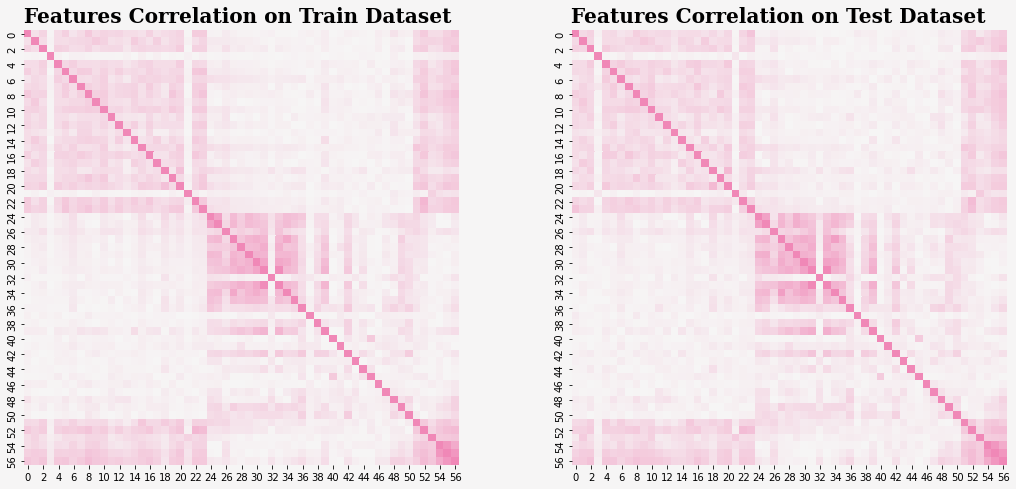

In [3]:
from scipy.stats import spearmanr
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

corr = spearmanr(X_train).correlation
corr_test = spearmanr(X_test).correlation

background_color = "#f6f5f5"
fig = plt.figure(figsize=(18, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
colors = ["#f088b7", "#f6f5f5", "#f088b7"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
ax0.set_facecolor(background_color)
ax0.text(0, -1, 'Features Correlation on Train Dataset', fontsize=20, fontweight='bold', fontfamily='serif')
ax1.set_facecolor(background_color)
ax1.text(-0.1, -1, 'Features Correlation on Test Dataset', fontsize=20, fontweight='bold', fontfamily='serif')

sns.heatmap(corr, ax=ax0, vmin=-1, vmax=1, annot=False, square=True,
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap, fmt='.1g')
sns.heatmap(corr_test, ax=ax1, vmin=-1, vmax=1, annot=False, square=True,
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap, fmt='.1g')
plt.show()


# Use multicollinearity detection

Enable multicollinearity detection with `collinearity_detection=True`

In [4]:
experiment = make_experiment(train_data.copy(), target='Spam', 
                             reward_metric='precision', pos_label=1,
                             random_state=8888, max_trials=30, early_stopping_rounds=0,
                             collinearity_detection=True)
estimator = experiment.run()


In [5]:
estimator.steps

[('data_clean',
  DataCleanStep(cv=True,
                data_cleaner_args={'correct_object_dtype': True,
                                   'drop_columns': None,
                                   'drop_constant_columns': True,
                                   'drop_duplicated_columns': False,
                                   'drop_idness_columns': True,
                                   'drop_label_nan_rows': True,
                                   'int_convert_to': 'float', 'nan_chars': None,
                                   'reduce_mem_usage': False,
                                   'reserve_columns': None},
                name='data_clean')),
 ('multicollinearity_detection',
  MulticollinearityDetectStep(name='multicollinearity_detection')),
 ('estimator',
  GreedyEnsemble(weight=[0.6, 0.15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], scores=[0.9898785425101214, 0.9898785425101214, 0.9898785425101214, 0.9910394265232975, 0

In [6]:
scorer = metric_to_scoring('precision', pos_label=1)
score = scorer(estimator, X_test, y_test)
score

0.9699248120300752